- Guzmán Pérez Karla Isela
- Velasco Avila Cristopher

# Ejercicio 1: Predicción de Riesgo de Diabetes
## Descripción:
Utiliza un dataset que incluye datos sobre registros médicos de pacientes femeninas para
determinar si un paciente tiene diabetes o no.
Dataset: Diabetes Dataset
Propuestas de Modelos: Regresión logística, KNN o Random Forest.

In [1]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import pyarrow

1. Carga y exploración general de los datos
Importa los datos y haz un análisis inicial de las variables (tipos, valores nulos,
estadísticas básicas).


Para comenzar, debemos importar el archivo CSV que contiene el dataset de diabetes y realizar un análisis inicial. Para ello, vamos a observar como se ven los primeros registros, las columnas disponibles, los tipos de datos y si hay valores nulos.

In [2]:
data = pl.read_csv("diabetes.csv")
data

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
i64,i64,i64,i64,i64,f64,f64,i64,i64
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
…,…,…,…,…,…,…,…,…
10,101,76,48,180,32.9,0.171,63,0
2,122,70,27,0,36.8,0.34,27,0
5,121,72,23,112,26.2,0.245,30,0


Los datos se importan desde un archivo CSV y se realiza un análisis inicial para entender la estructura del dataset, los tipos de variables, la presencia de valores nulos y algunas estadísticas descriptivas básicas.

In [3]:
# Mostrar tipos de datos de cada columna
columns = data.columns
columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

Podemos apreciar que los tipos de dato son solo enteros y flotantes. Esto facilita mucho el analisis de los datos.

In [4]:
# Cantidad de valores nulos por columna
nulos = data.null_count()
nulos

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0


Gracias al metodo null_count podemos ver que no hay valores nulos en el dataset, lo cual es una buena noticia para el analisis posterior.

In [5]:
estadisticas = data.describe()
estadisticas

statistic,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
str,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",768.0,768.0,768.0,768.0,768.0,768.0,768.0,768.0,768.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
"""std""",3.369578,31.972618,19.355807,15.952218,115.244002,7.88416,0.331329,11.760232,0.476951
"""min""",0.0,0.0,0.0,0.0,0.0,0.0,0.078,21.0,0.0
"""25%""",1.0,99.0,62.0,0.0,0.0,27.3,0.244,24.0,0.0
"""50%""",3.0,117.0,72.0,23.0,32.0,32.0,0.374,29.0,0.0
"""75%""",6.0,140.0,80.0,32.0,127.0,36.6,0.626,41.0,1.0
"""max""",17.0,199.0,122.0,99.0,846.0,67.1,2.42,81.0,1.0


Aqui podemos notar diversas incongruencias en los datos, como los valores minimos de glucosa, presion sanguinea. Por lo que habria que filtrar estos datos incompletos para un mejor analisis y entrenamiento de los modelos. Incluso aunque no hay valores nulos, si hay valores que no tienen sentido y que pueden afectar el rendimiento del modelo.

Limpieza básica.
Trata los valores faltantes, elimina duplicados, corrige tipos, etc.


En los datos hay varios valores con un valor de 0 que no tienen sentido, como la glucosa, la presion sanguinea, el indice de masa corporal, etc. Por lo que se procede a eliminar estos valores para un mejor analisis y entrenamiento del modelo.
Para ello, primero convertimos estos valores a nulos y posteriormente eliminamos las filas con los nulos. Asi nos quedaremos unicamente con datos que podemos usar mas adelante.

In [6]:
cols=["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

data_fixed = data.with_columns(
    pl.when(pl.col(col) == 0)
      .then(None)
      .otherwise(pl.col(col))
      .alias(col)
    for col in cols
)

print(data_fixed)
data_fixed = data_fixed.drop_nulls()
data_fixed.describe()

shape: (768, 9)
┌─────────────┬─────────┬───────────────┬───────────────┬───┬──────┬───────────────┬─────┬─────────┐
│ Pregnancies ┆ Glucose ┆ BloodPressure ┆ SkinThickness ┆ … ┆ BMI  ┆ DiabetesPedig ┆ Age ┆ Outcome │
│ ---         ┆ ---     ┆ ---           ┆ ---           ┆   ┆ ---  ┆ reeFunction   ┆ --- ┆ ---     │
│ i64         ┆ i64     ┆ i64           ┆ i64           ┆   ┆ f64  ┆ ---           ┆ i64 ┆ i64     │
│             ┆         ┆               ┆               ┆   ┆      ┆ f64           ┆     ┆         │
╞═════════════╪═════════╪═══════════════╪═══════════════╪═══╪══════╪═══════════════╪═════╪═════════╡
│ 6           ┆ 148     ┆ 72            ┆ 35            ┆ … ┆ 33.6 ┆ 0.627         ┆ 50  ┆ 1       │
│ 1           ┆ 85      ┆ 66            ┆ 29            ┆ … ┆ 26.6 ┆ 0.351         ┆ 31  ┆ 0       │
│ 8           ┆ 183     ┆ 64            ┆ null          ┆ … ┆ 23.3 ┆ 0.672         ┆ 32  ┆ 1       │
│ 1           ┆ 89      ┆ 66            ┆ 23            ┆ … ┆ 28.1 ┆ 0.167 

statistic,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
str,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",392.0,392.0,392.0,392.0,392.0,392.0,392.0,392.0,392.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",3.30102,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
"""std""",3.211424,30.860781,12.496092,10.516424,118.84169,7.027659,0.345488,10.200777,0.471401
"""min""",0.0,56.0,24.0,7.0,14.0,18.2,0.085,21.0,0.0
"""25%""",1.0,99.0,62.0,21.0,77.0,28.4,0.27,23.0,0.0
"""50%""",2.0,119.0,70.0,29.0,126.0,33.2,0.452,27.0,0.0
"""75%""",5.0,143.0,78.0,37.0,190.0,37.1,0.687,36.0,1.0
"""max""",17.0,198.0,110.0,63.0,846.0,67.1,2.42,81.0,1.0


Con esto hemos limpiado los valores con 0 y podemos proceder al analisis descriptivo. Eliminando asi todos los valores nulos y los posibles valores faltantes de cero

Análisis exploratorio + visualización inicial
Realiza un análisis estadístico descriptivo y gráficos que muestren patrones o
relaciones importantes.


Para poder observar correctamente los datos en forma de graficas, podemos usar la relación entre cada dato y el resultado de diabetes. Para lograr esto, usaremos una grafica de boxplot que nos permite observar la distribución de los datos y las posibles relaciones entre ellos.

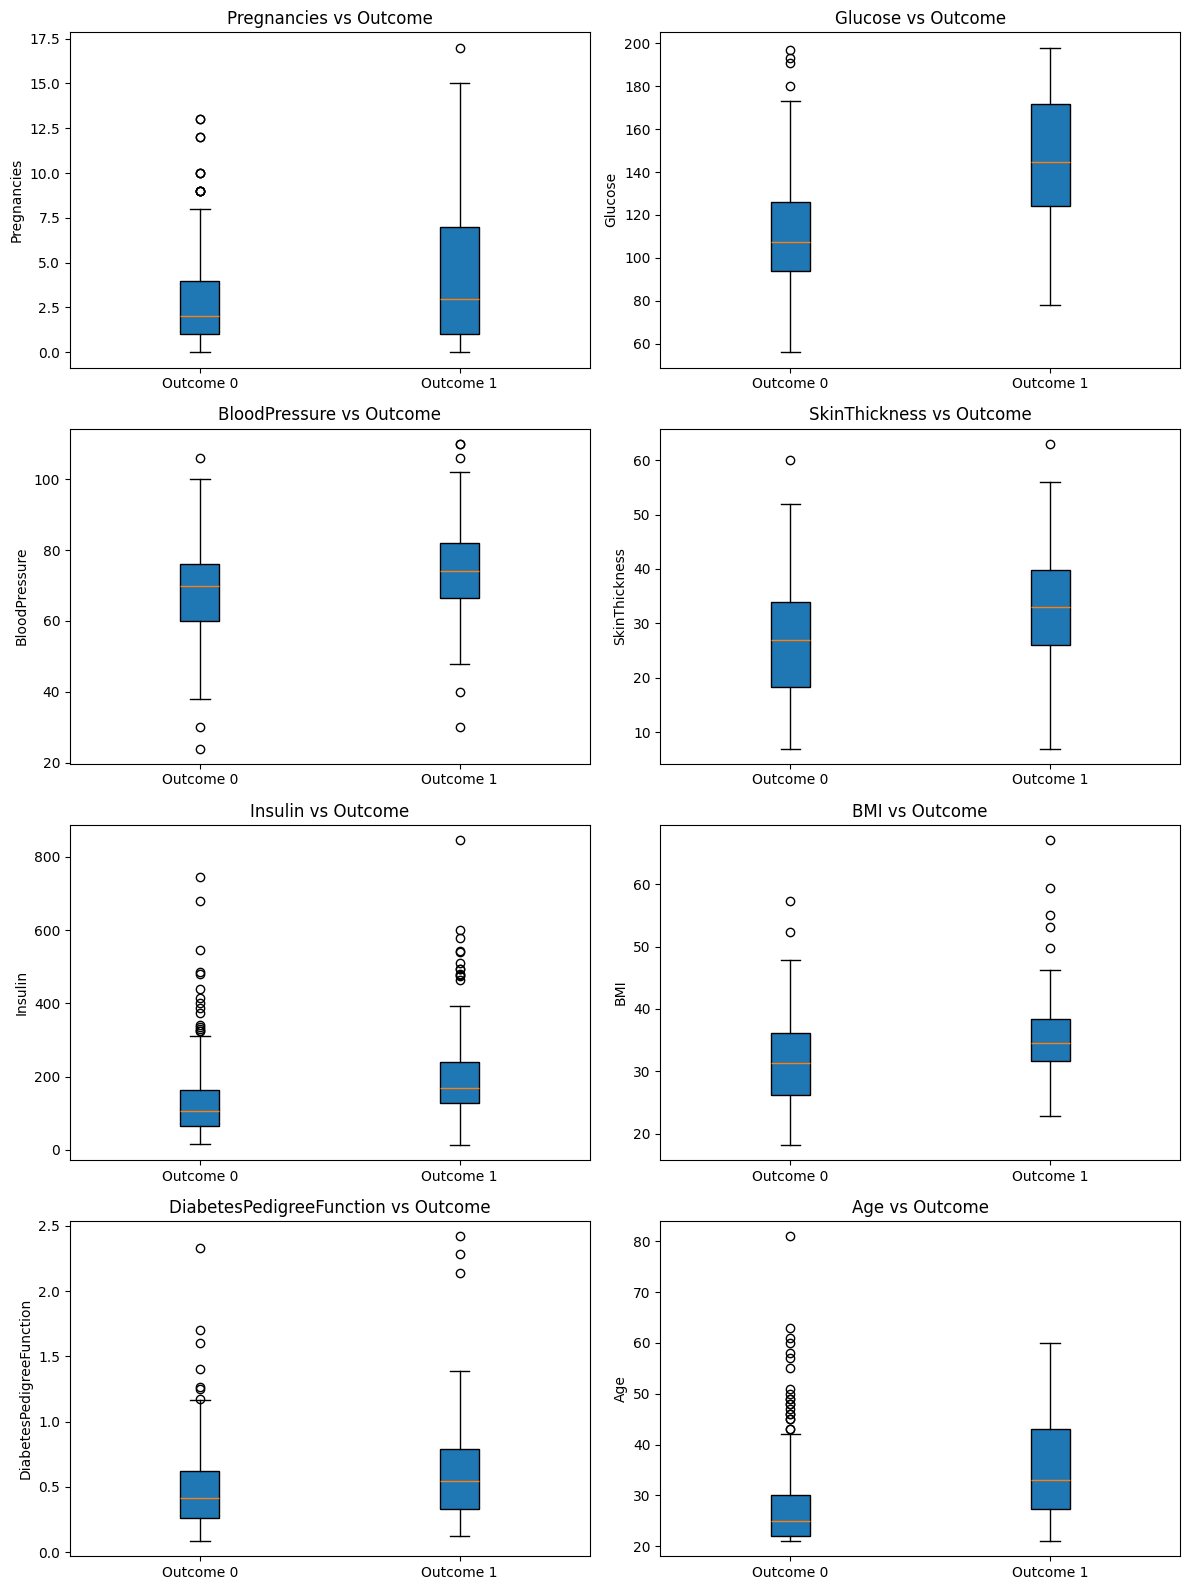

In [ ]:

columnas_num = [
    "Pregnancies", "Glucose", "BloodPressure",
    "SkinThickness", "Insulin", "BMI",
    "DiabetesPedigreeFunction", "Age"
]

df_plot = data_fixed.select(columnas_num + ["Outcome"]).to_pandas()

n_cols = 2
n_rows = (len(columnas_num) + 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
axes = axes.flatten()

for idx, col in enumerate(columnas_num):
    ax = axes[idx]
    ax.boxplot(
        [df_plot[df_plot["Outcome"] == 0][col].dropna(),
         df_plot[df_plot["Outcome"] == 1][col].dropna()],
        tick_labels=["Outcome 0", "Outcome 1"],
        patch_artist=True
    )
    ax.set_title(f"{col} vs Outcome")
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()

Para esta parte, hemos desarrollado dos diagramas de caja para ver la distribución de los datos y su posible relación con la diabetes. Los datos arrojan una varianza muy alta con ciertos valores, lo que podria representar que dichas variables no son muy representativas para nuestro modelo.

4. Preprocesamiento técnico (normalización, codificación, escalado, etc.)
Prepara los datos para modelo como: normalización, codificación, escalado....


In [10]:
numeric_cols = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
                "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

data_scaled = data_fixed.with_columns([
    ((pl.col(col) - pl.col(col).min()) / (pl.col(col).max() - pl.col(col).min())).alias(col)
    for col in numeric_cols
])
data_scaled.describe()

statistic,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
str,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",392.0,392.0,392.0,392.0,392.0,392.0,392.0,392.0,392.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",0.194178,0.469208,0.542596,0.395454,0.170741,0.304422,0.1876,0.164413,0.331633
"""std""",0.188907,0.217329,0.145303,0.187793,0.142839,0.143715,0.147961,0.170013,0.471401
"""min""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""25%""",0.058824,0.302817,0.44186,0.25,0.075721,0.208589,0.079229,0.033333,0.0
"""50%""",0.117647,0.443662,0.534884,0.392857,0.134615,0.306748,0.157173,0.1,0.0
"""75%""",0.294118,0.612676,0.627907,0.535714,0.211538,0.386503,0.257816,0.25,1.0
"""max""",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


5. Entrenamiento del modelo de ML .
Selecciona y entrena el modelo de machine learning para resolver el problema
planteado.


Se ha seleccionado el modelo de regresión logística para este ejercicio, ya que es un modelo simple y efectivo para problemas de clasificación binaria como el de la diabetes. Se ha dividido el dataset en un conjunto de entrenamiento y otro de prueba, y se ha entrenado el modelo con los datos de entrenamiento.

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
X = np.array(data_scaled[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
                "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]])
print(pl.DataFrame(X))

Y = np.array(data_scaled["Outcome"])
print(pl.DataFrame(Y))

shape: (392, 8)
┌──────────┬──────────┬──────────┬──────────┬──────────┬──────────┬──────────┬──────────┐
│ column_0 ┆ column_1 ┆ column_2 ┆ column_3 ┆ column_4 ┆ column_5 ┆ column_6 ┆ column_7 │
│ ---      ┆ ---      ┆ ---      ┆ ---      ┆ ---      ┆ ---      ┆ ---      ┆ ---      │
│ f64      ┆ f64      ┆ f64      ┆ f64      ┆ f64      ┆ f64      ┆ f64      ┆ f64      │
╞══════════╪══════════╪══════════╪══════════╪══════════╪══════════╪══════════╪══════════╡
│ 0.058824 ┆ 0.232394 ┆ 0.488372 ┆ 0.285714 ┆ 0.096154 ┆ 0.202454 ┆ 0.035118 ┆ 0.0      │
│ 0.0      ┆ 0.570423 ┆ 0.186047 ┆ 0.5      ┆ 0.185096 ┆ 0.509202 ┆ 0.943469 ┆ 0.2      │
│ 0.176471 ┆ 0.15493  ┆ 0.302326 ┆ 0.446429 ┆ 0.088942 ┆ 0.261759 ┆ 0.069807 ┆ 0.083333 │
│ 0.117647 ┆ 0.992958 ┆ 0.534884 ┆ 0.678571 ┆ 0.635817 ┆ 0.251534 ┆ 0.031263 ┆ 0.533333 │
│ 0.058824 ┆ 0.93662  ┆ 0.418605 ┆ 0.285714 ┆ 1.0      ┆ 0.243354 ┆ 0.134047 ┆ 0.633333 │
│ …        ┆ …        ┆ …        ┆ …        ┆ …        ┆ …        ┆ …        ┆ …    

In [41]:
model = LogisticRegression(max_iter=100000)

X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size = 0.2,
                                                    random_state = 0,
                                                    shuffle = True)

model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100000
,multi_class,'deprecated'


## Visualización de resultados y métricas: Muestra los resultados y métricas con gráficos claros y explicativos.

              precision    recall  f1-score   support

           0       0.81      0.94      0.87        54
           1       0.81      0.52      0.63        25

    accuracy                           0.81        79
   macro avg       0.81      0.73      0.75        79
weighted avg       0.81      0.81      0.80        79



Text(0.5, 1.0, 'Matriz confusión')

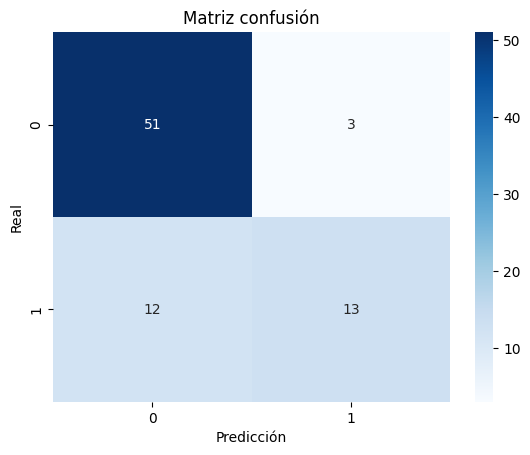

In [42]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz confusión')

Aunque la matriz indica algunas predicciones incorrectas, el modelo ha logrado una precisión de alrededor del 80% en la clasificación de los datos de prueba. Esto sugiere que el modelo es razonablemente efectivo para predecir la presencia de diabetes en pacientes basándose en las características proporcionadas.